In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import csv

In [156]:
# process data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [157]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
train_labels = pd.DataFrame()
train_labels = train_data['label'].values

In [160]:
training_data = train_data.iloc[:, 1:]
training_data = training_data.astype('float32') / 255

In [161]:
test_data = test_data.astype('float32') / 255

In [162]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

In [163]:
height = 28
width = 28

In [164]:
# reshape training data into nd-array with images
training_data = training_data.values.reshape(-1, height, width, 1)
test_data = test_data.values.reshape(-1, width, height, 1)
print(training_data.shape)

(42000, 28, 28, 1)


In [165]:
# define function to create model
def build_model():
    model = Sequential([
        Conv2D(16, (3,3), 1, activation='relu', input_shape=(height, width, 1)),
        MaxPooling2D(),
        Conv2D(32, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Conv2D(16, (3,3), 1, activation='relu'),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile('adam', loss=keras.losses.CategoricalCrossentropy, metrics=['accuracy'])
    return model

In [166]:
# initialize model
model = build_model()
model.summary()

c:\Users\ekamr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        37,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,114 (191.85 KB)

 Trainable params: 49,114 (191.85 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
# train model
hist = model.fit(training_data, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7478 - loss: 0.8915 - val_accuracy: 0.9587 - val_loss: 0.1357
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9638 - loss: 0.1212 - val_accuracy: 0.9738 - val_loss: 0.0840
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9776 - loss: 0.0739 - val_accuracy: 0.9801 - val_loss: 0.0652
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9815 - loss: 0.0604 - val_accuracy: 0.9824 - val_loss: 0.0604
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9839 - val_loss: 0.0488
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9864 - val_loss: 0.0432
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9891 - loss: 0.0317 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9906 - loss: 0.0286 - val_accu

In [168]:
# visualize loss and accuracy
def plot_loss(hist):
    fig = plt.figure()
    plt.plot(hist.history['loss'], color='teal', label='loss')
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

def plot_accuracy(hist):
    fig = plt.figure()
    plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


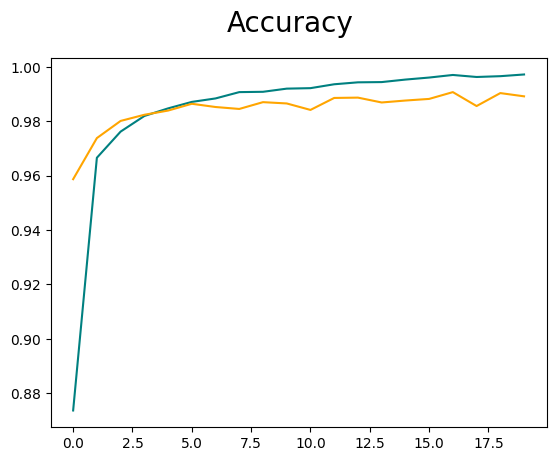

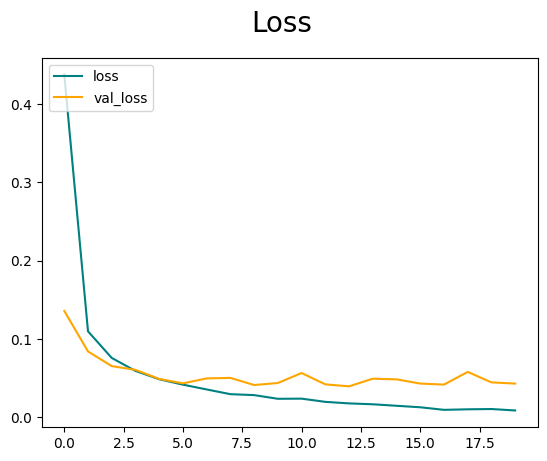

In [169]:
history_dict = hist.history
print(history_dict.keys())
plot_accuracy(hist)
plot_loss(hist)

In [172]:
predictions = model.predict(test_data)
print(predictions.shape)
predictions = np.argmax(predictions, 1)
print(predictions)
print(predictions.shape)

predictions = pd.Series(predictions, name='Label')
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), predictions], axis=1)
submission.to_csv('submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
(28000, 10)
[2 0 9 ... 3 9 2]
(28000,)
